In [1]:
spark.version

'3.0.1'

In [2]:
import subprocess

from pyspark.sql.functions import *
from pyspark.sql.types import *

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [3]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [4]:
%%time

top50 = spark.read.parquet('gs://file-name')

CPU times: user 0 ns, sys: 4.03 ms, total: 4.03 ms
Wall time: 6.11 s


In [7]:
#top50.count()

In [6]:
#top50.cache()

In [9]:
#top50.printSchema()

## Slide 6/7

In [7]:
slide67 = top50.select(['user_id', 'user_name', 'count', 'quote_count', 'retweet_count', 'Organization', 'verified_user', 'avg_influence', 'retweeted_status'])

In [15]:
#slide67.printSchema()

In [7]:
original = slide67.filter(slide67.retweeted_status.isNull())

In [19]:
#original

In [ ]:
#list top 10 twitterers by total tweet count and total retweet count

In [8]:
original2 = original\
    .withColumn("retweet_quote_count", col("retweet_count")+col("quote_count"))

In [8]:
slide672 = slide67\
    .withColumn("retweet_quote_count", col("retweet_count")+col("quote_count"))

In [9]:
slide672

user_id,user_name,count,quote_count,retweet_count,Organization,verified_user,avg_influence,retweeted_status,retweet_quote_count
29143,good trouble save...,4,24,270,Other,false,0.38481675392670156,"[,, Wed Oct 20 13...",294
29143,good trouble save...,4,0,0,Other,false,0.38481675392670156,null,0
29143,good trouble save...,4,0,0,Other,false,0.38481675392670156,null,0
29143,good trouble save...,4,0,0,Other,false,0.38481675392670156,null,0
79833,jean t 🦋,3,0,1,Other,false,1.6168831168831168,"[,, Thu Nov 04 23...",1
79833,jean t 🦋,3,0,9,Other,false,1.6168831168831168,"[,, Thu Nov 11 00...",9
79833,jean t 🦋,3,0,5,Other,false,1.6168831168831168,"[,, Mon Nov 08 22...",5
621043,ian d. sharman 🟠⬆️,2,1,164,Other,false,0.5295283392786365,"[,, Mon Oct 18 06...",165
621043,ian d. sharman 🟠⬆️,2,0,1,Other,false,0.5295283392786365,"[,, Wed Nov 10 08...",1
638163,pat w,1,4,27,Other,false,0.3780487804878049,"[,, Fri Oct 29 18...",31


In [10]:
retweet_count = slide672.groupby("user_id").agg(sum("retweet_quote_count").alias("total_retweet_count"))

In [12]:
#retweet_count

In [13]:
users = slide67.select(['user_id', 'user_name', 'Organization', 'verified_user', 'avg_influence'])

In [17]:
user_retweet_counts = users.join(retweet_count, "user_id")

In [19]:
#user_retweet_counts

In [20]:
user_retweet_counts2 = original_user_counts.na.fill(value=0,subset=["total_retweet_count"])

In [22]:
#user_retweet_counts2

In [23]:
user_retweet_counts3 = user_retweet_counts2.drop('user_id')

In [24]:
distinct_original_user_counts = user_retweet_counts3.dropDuplicates(['user_name'])

In [25]:
distinct_original_user_counts

user_name,Organization,verified_user,avg_influence,total_retweet_count
!muted milk man,Other,false,0.2607361963190184,3060
"""dreg of society""",Other,false,0.4610472541507024,361
"""sexy"" dr liz dow...",Other,false,0.3144031668696711,2065
"""the science""",Other,false,6.629637904078592,24127
"""you cannot be se...",Other,false,8.409514076660537,31569
#1 kr beast fan,Other,false,1.1452401457673065,3740
#15temmuz! ⚡ 🇹🇷 🥰,Other,false,0.27313769751693,121
#24 💫,Other,false,0.8060899477640464,81
#_#,Other,false,0.4084077880493725,7908
#askamazingkisumu,Other,false,7.587145989472317,116


In [74]:
#distinct_original_user_counts.orderBy("count", ascending = False).show(20, truncate = False)

In [27]:
distinct_original_user_counts.orderBy("total_retweet_count", ascending = False).show(20, truncate = False)

+----------------------------+------------+-------------+------------------+-------------------+
|user_name                   |Organization|verified_user|avg_influence     |total_retweet_count|
+----------------------------+------------+-------------+------------------+-------------------+
|covidoff bot 🤖             |Other       |false        |2934.2153954944024|3112127            |
|contraterrorismo 🇪🇸       |Other       |false        |84.22520486264237 |2238941            |
|a devoted yogi              |Other       |false        |178.50290786531912|942016             |
|michael hung ming lin, phd  |Other       |false        |337.09112560425956|907016             |
|juan roberto barba ribera   |Other       |false        |59.64775046777144 |820966             |
|barn owl enthusiast         |Other       |false        |1.4882322862296467|796891             |
|doris vazquez               |Other       |false        |30.207465612839037|719178             |
|seeking truth & justice🇺🇸 |Other

#### plot distribution of retweet count and total count of tweets 

In [12]:
slide6 = top50.select(['id','count','Organization'])

In [13]:
slide6_2 = slide6.dropDuplicates(['id'])

In [16]:
slide62 = slide6_2.groupBy('Organization').count()

In [17]:
slide62

Organization,count
Government,30236
Influencer,69948
Health,52063
Other,10695313
Celebrity,9273
News,148450


In [18]:
df_pandas_slide6 = slide62.orderBy("count", ascending = False).toPandas()

In [19]:
df_pandas_slide6

,Organization,count
0,Other,10695313
1,News,148450
2,Influencer,69948
3,Health,52063
4,Government,30236
5,Celebrity,9273


In [20]:
df_pandas_slide62 = df_pandas_slide6.drop([0])

NameError: name 'plt' is not defined

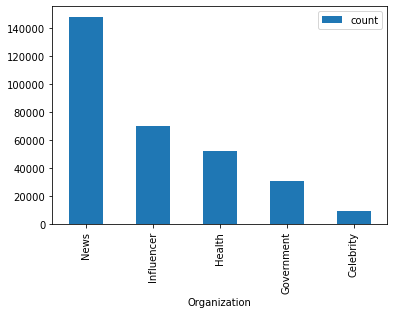

In [22]:
df_pandas_slide62.plot(kind='bar', x='Organization', y='count')
plt.show()

In [28]:
import pandas as pd

In [29]:
organization = distinct_original_user_counts.select(['Organization', 'total_retweet_count'])

In [30]:
organization2 = organization.groupBy('Organization').agg(sum("total_retweet_count").alias("total_retweet_count"))

In [31]:
organization2

Organization,total_retweet_count
Government,4764349
Influencer,14443337
Health,5188412
Other,8452201660
Celebrity,3045421
News,8415454


In [ ]:
df_pandas = organization2.orderBy("total_tweet_count", ascending = False).toPandas()

In [34]:
df_pandas

,Organization,total_retweet_count
0,Other,8453752024
1,Influencer,14527954
2,News,8565858
3,Health,5109843
4,Government,4747962
5,Celebrity,2997615


In [35]:
df_pandas2 = df_pandas.drop([0])

NameError: name 'plt' is not defined

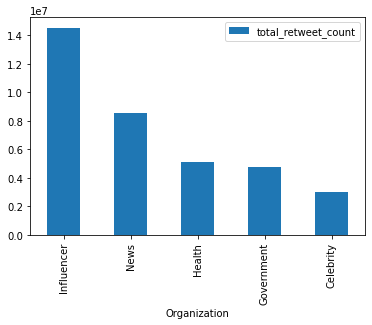

In [37]:
df_pandas2.plot(kind='bar', x='Organization', y='total_retweet_count')
plt.show()

## Slide 7

In [ ]:
#number of influential twitters in each group

In [70]:
news = original.select(['user_id', 'user_name', 'Organization', 'avg_influence', 'verified_user'])

In [71]:
news2 = news.dropDuplicates(['user_id'])

In [72]:
news3 = news2.filter(news.Organization == 'News')

In [73]:
news3.orderBy('avg_influence', ascending = False).show(20, truncate = False)

+-------------------+----------------------+------------+------------------+-------------+
|user_id            |user_name             |Organization|avg_influence     |verified_user|
+-------------------+----------------------+------------+------------------+-------------+
|37874853           |the straits times     |News        |366.5             |true         |
|36327407           |hindustan times       |News        |137.2             |true         |
|6509832            |news18                |News        |137.12981366459627|true         |
|94761188           |the new indian express|News        |131.32540490910054|true         |
|38647512           |the indian express    |News        |123.2190476190476 |true         |
|37034483           |ndtv                  |News        |115.55104937111125|true         |
|330826792          |rappler               |News        |114.36082251082252|true         |
|8859092            |portland press herald |News        |109.62251082251082|true         |

In [74]:
health = news2.filter(news.Organization == 'Health')

In [75]:
health.orderBy('avg_influence', ascending = False).show(20, truncate = False)

+-------------------+-----------------------------------------------+------------+------------------+-------------+
|user_id            |user_name                                      |Organization|avg_influence     |verified_user|
+-------------------+-----------------------------------------------+------------+------------------+-------------+
|48110818           |liz szabo                                      |Health      |166.34266304851903|true         |
|1600540866         |lucy johnston                                  |Health      |139.75393045948752|true         |
|953924228306305024 |cleavon md 💉                                  |Health      |130.4749565642722 |true         |
|65073830           |nyc health + hospitals                         |Health      |99.70193175245807 |true         |
|428887166          |coventry and warwickshire partnership nhs trust|Health      |72.21054309674999 |true         |
|2596143056         |ministry of health                             |Heal

In [76]:
gov = news2.filter(news.Organization == 'Government')

In [77]:
gov.orderBy('avg_influence', ascending = False).show(20, truncate = False)

+-------------------+-------------------------------------------------+------------+------------------+-------------+
|user_id            |user_name                                        |Organization|avg_influence     |verified_user|
+-------------------+-------------------------------------------------+------------+------------------+-------------+
|1199771785148993536|heerak christian kim for us congress (virginia-8)|Government  |133.60160636281128|true         |
|166374616          |john bel edwards                                 |Government  |74.25             |true         |
|185174745          |martin cowen                                     |Government  |64.93409008127459 |true         |
|1117578102         |meghin delaney                                   |Government  |48.28235299038536 |true         |
|180748385          |orf                                              |Government  |42.40735930735931 |true         |
|174365756          |yusuf abramjee                     

In [78]:
celebrity = news2.filter(news.Organization == 'Celebrity')

In [79]:
celebrity.orderBy('avg_influence', ascending = False).show(20, truncate = False)

+----------+------------------------------------------------+------------+------------------+-------------+
|user_id   |user_name                                       |Organization|avg_influence     |verified_user|
+----------+------------------------------------------------+------------+------------------+-------------+
|156306739 |morgan fairchild                                |Celebrity   |97.8746969890777  |true         |
|252398355 |daniel horowitz                                 |Celebrity   |56.02160147884942 |true         |
|174618314 |montgomery granger                              |Celebrity   |52.29190974510014 |true         |
|558360059 |john ziegler                                    |Celebrity   |46.37497223277422 |true         |
|593289567 |prof peter hotez md phd                         |Celebrity   |45.54636655052956 |true         |
|91942071  |🟣 bobby umar | keynote speaker                 |Celebrity   |39.944830284611236|true         |
|299273962 |laurie garrett   

In [80]:
influencer = news2.filter(news.Organization == 'Influencer')

In [81]:
influencer.orderBy('avg_influence', ascending = False).show(20, truncate = False)

+-------------------+--------------------------------------+------------+------------------+-------------+
|user_id            |user_name                             |Organization|avg_influence     |verified_user|
+-------------------+--------------------------------------+------------+------------------+-------------+
|54886540           |(((dorit reiss)))                     |Influencer  |167.34829280283392|true         |
|16148602           |alan w. silberberg                    |Influencer  |157.93173978678215|true         |
|29155120           |bfm89.9                               |Influencer  |93.8846153846154  |true         |
|23398730           |david rider                           |Influencer  |77.35942649068335 |true         |
|606512828          |njhumanservices                       |Influencer  |74.96474131478877 |true         |
|895118100          |john bowe                             |Influencer  |63.930643710995476|true         |
|3025693730         |north western ra

## Slide 8

In [ ]:
# list top 5 twitters based on inlfuence score for each organization type

In [ ]:
twitters_by_organization = subset2.select(['user_name', 'Organization', 'avg_influence'])

In [ ]:
twitters_by_organization.cache()

In [ ]:
news = twitters_by_organization.filter(when(twitters_by_organization.Organization == 'News'))

In [ ]:
news.orderby('avg_influence', ascending = False).show(10)

In [ ]:
gov = twitters_by_organization.filter(when(twitters_by_organization.Organization == 'Government'))

In [ ]:
gov.orderby('avg_influence', ascending = False).show(10)

In [ ]:
health = twitters_by_organization.filter(when(twitters_by_organization.Organization == 'Health'))

In [ ]:
health.orderby('avg_influence', ascending = False).show(10)

In [ ]:
influencer = twitters_by_organization.filter(when(twitters_by_organization.Organization == 'Influencer'))

In [ ]:
influencer.orderby('avg_influence', ascending = False).show(10)

In [ ]:
celebrity = twitters_by_organization.filter(when(twitters_by_organization.Organization == 'Celebrity'))

In [ ]:
celebrity.orderby('avg_influence', ascending = False).show(10)

In [ ]:
other = twitters_by_organization.filter(when(twitters_by_organization.Organization == 'Other'))

In [ ]:
other.orderby('avg_influence', ascending = False).show(10)